In [1]:
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 8)
pd.options.mode.chained_assignment = None     # default='warn'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# make width of notebook track with width of browser window
# from IPython.core.display import HTML
# HTML("<style>.container{ width: 100% !important; }</style>")

In [2]:
emailDf = pd.read_csv('email.csv')

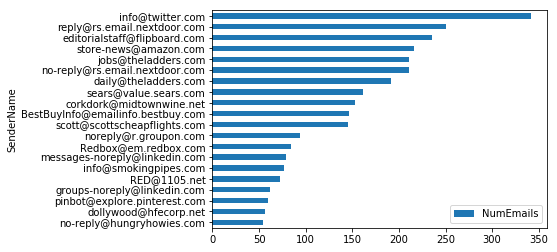

In [10]:
# show top senders
%matplotlib inline
import matplotlib.pyplot as plt

#agg top 20 senders
emailDf['SenderName'] = emailDf.Sender.apply(lambda s: s[s.find('<') + 1 : s.find('>')])
agg = emailDf.groupby(by="SenderName").sum().sort_values(["NumEmails"],ascending=False).head(20)
# df.drop('SenderName',inplace=True,axis=1)
agg.sort_values(["NumEmails"]).plot(kind='barh')
plt.show()

In [4]:
# aggregate by date and format date column
from datetime import datetime
emailDf2 = emailDf[['Received','NumEmails']].copy()
emailDf2["Received"] =pd.to_datetime(emailDf["Received"]).dt.normalize()  # .date
emailDf2 = emailDf2.groupby(by="Received").sum()
emailDf2.reset_index(inplace=True)
emailDf2['dow']=pd.to_datetime(emailDf2.Received).dt.weekday.astype('str') 
emailDf2['dowName'] = pd.to_datetime(emailDf2.Received).dt.weekday_name
# pd.crosstab(emailDf2.dow,emailDf2.dowName) # prints grid of dow to dowName relationship
# emailDf2.pivot(index='dow',columns='dowName') #doesn't work b/c dow contains dups

import numpy as np
np.sort(emailDf2.dow.unique())

array(['0', '1', '2', '3', '4', '5', '6'], dtype=object)

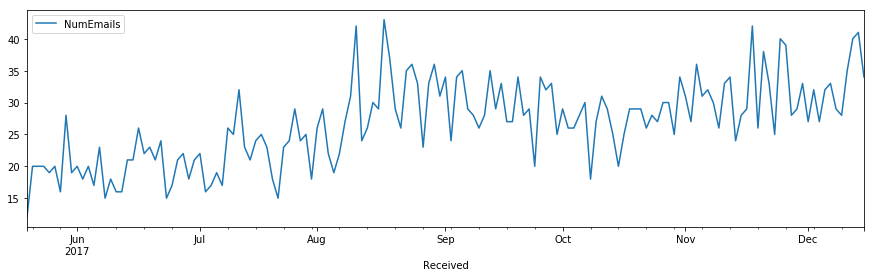

In [5]:
emailDf2.set_index('Received',inplace=True)
emailDf2[emailDf2.dow<'5'].plot(figsize=(15,4))
plt.show()

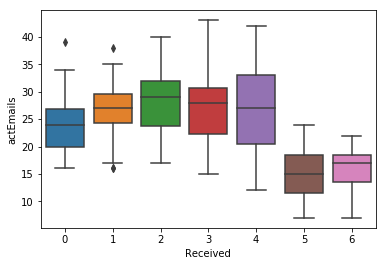

In [6]:
df3 = emailDf2.copy()
df3.reset_index(inplace=True)
df3.rename(columns={'NumEmails':'actEmails'},inplace=True)
# df3.head()

import seaborn as sns
sns.boxplot(pd.to_datetime(df3.Received).dt.weekday,df3.actEmails)

In [7]:
#ordinary least squares
import statsmodels.formula.api as sm
result = sm.ols(formula="actEmails ~ dow",data=df3).fit()
# result.params
# print(result.summary())
df3['forecastEmails']=result.predict()
df3.head(3)

,Received,actEmails,dow,dowName,forecastEmails
0,2017-05-19,12,4,Friday,26.612903
1,2017-05-20,8,5,Saturday,15.129032
2,2017-05-21,11,6,Sunday,15.806452


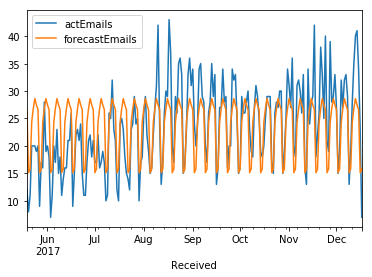

In [8]:
df4 = df3.set_index('Received')
df4.plot()
plt.show()

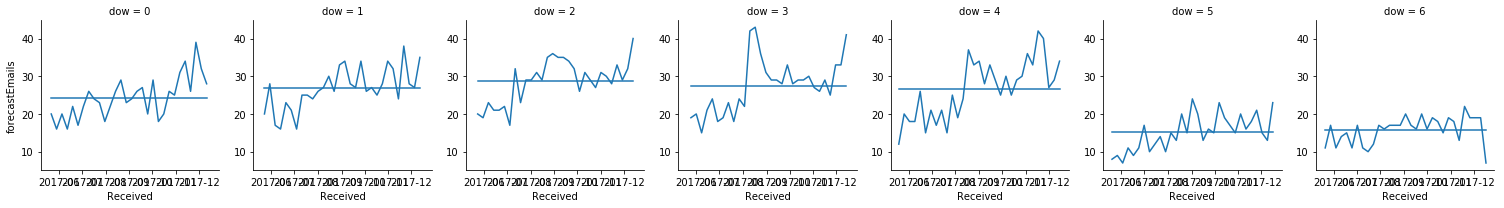

In [9]:
g = sns.FacetGrid(df3,col='dow')
g.map(plt.plot,'Received','actEmails')
g.map(plt.plot,'Received','forecastEmails')
plt.show()

In [ ]:
# emailDf.head(5) # all emails
# emailDf2.head(5) # numemails grouped on received as index
# df3.head(5) #num and forecasted emails, no index
# df4.head(5) #num and forecasted emails, indexed on received